# Solving the RBC model

In [113]:
using Dolo


The RBC model is defined in a YAML file which we can read locally.

In [114]:
filename= "../models/rbc.yaml"

readlines(filename)

87-element Vector{String}:
 "name: Real Business Cycle"
 ""
 "model_type: dtcc"
 ""
 "symbols:"
 ""
 "   exogenous: [z]"
 "   states: [k]"
 "   controls: [n, i]"
 "   expectations: [m]"
 ⋮
 ""
 "options:"
 "    grid: !Cartesian"
 "        orders: [50]"
 ""
 "test: |"
 "    chi*n^eta*c^sigma - (1-alpha)*y/n           | 0 <= n <= inf"
 "    1 - beta*(c/c(1))^(sigma)*(1-delta+rk(1))  | 0 <= i <= inf"
 "    "


yaml_import(filename) reads the YAML file and generates a model object.

In [115]:
model = yaml_import(filename)

[0.000256]


Model

The model file already has values for steady-state variables stated in the calibration section so we can go ahead and check that they are correct by computing the model equations at the steady state.

In [116]:
residuals(model)

Dict{Symbol, Vector{Float64}} with 2 entries:
  :transition => [0.0]
  :arbitrage  => [-4.44089e-16, 0.0]

Printing the model also lets us have a look at all the model equations and check that all residual errors are 0 at the steady-state, but with less display prescision.

In [117]:
Base.show(model)

Model

Next we compute a solution to the model using a first order perturbation method (see the source for the approximate_controls function). The result is a decsion rule object. By decision rule we refer to any object that is callable and maps states to decisions. This particular decision rule object is a TaylorExpansion (see the source for the TaylorExpansion class).

In [118]:
dr_pert = perturb(model)

Perturbation Results
 * Decision Rule type: Dolo.BiTaylorExpansion{2}
 * stable < true
 * determined < true



We now compute the global solution (see the source for the time_iteration function). It returns a decision rule object of type SmolyakGrid (see the source for the SmolyakGrid class).

In [119]:
dr_global = time_iteration(model)

------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     2.18e+00        6.18e-01        NaN             3.07e+08        9    


2     2.01e-01        5.31e-02        8.59e-02        1.56e+07        6    
3     1.24e-01        4.22e-02        7.95e-01        1.90e+07        6    
4     8.16e-02        3.36e-02        7.98e-01        3.70e+07        6    
5     5.87e-02        2.73e-02        8.12e-01        1.41e+07        5    


6     4.68e-02        2.26e-02        8.27e-01        1.38e+07        5    
7     3.85e-02        1.96e-02        8.68e-01        1.36e+07        5    
8     3.25e-02        1.72e-02        8.77e-01        1.37e+07        5    
9     2.81e-02        1.53e-02        8.92e-01        1.40e+07        5    
10    2.45e-02        1.37e-02        8.96e-01        1.74e+07        5    
11    2.16e-02        1.24e-02        9.01e-01        1.11e+07        4    
12    1.86e-02        1.09e-02        8.81e-01        1.12e+07        4    
13    1.61e-02        9.62e-03        8.83e-01        1.10e+07        4    


14    1.42e-02        8.63e-03        8.97e-01        1.11e+07        4    
15    1.27e-02        7.80e-03        9.04e-01        1.09e+07        4    
16    1.13e-02        7.03e-03        9.01e-01        1.10e+07        4    
17    1.01e-02        6.32e-03        8.99e-01        1.08e+07        4    
18    9.04e-03        5.69e-03        9.01e-01        1.16e+07        4    
19    8.12e-03        5.15e-03        9.04e-01        1.11e+07        4    
20    7.32e-03        4.67e-03        9.07e-01        1.36e+07        4    
21    6.62e-03        4.25e-03        9.09e-01        3.32e+07        4    


22    6.01e-03        3.87e-03        9.11e-01        1.11e+07        4    
23    5.46e-03        3.53e-03        9.13e-01        1.13e+07        4    
24    4.97e-03        3.23e-03        9.14e-01        1.09e+07        4    
25    4.54e-03        2.96e-03        9.16e-01        1.16e+07        4    
26    4.15e-03        2.71e-03        9.17e-01        1.58e+07        4    
27    3.80e-03        2.49e-03        9.18e-01        1.20e+07        4    
28    3.48e-03        2.28e-03        9.18e-01        9.23e+06        3    
29    3.19e-03        2.10e-03        9.19e-01        9.16e+06        3    


30    2.93e-03        1.93e-03        9.20e-01        8.49e+06        3    
31    2.69e-03        1.78e-03        9.20e-01        8.47e+06        3    
32    2.47e-03        1.64e-03        9.21e-01        8.87e+06        3    
33    2.27e-03        1.51e-03        9.21e-01        8.60e+06        3    
34    2.09e-03        1.39e-03        9.21e-01        8.99e+06        3    
35    1.92e-03        1.28e-03        9.22e-01        8.53e+06        3    
36    1.77e-03        1.18e-03        9.22e-01        9.02e+06        3    
37    1.63e-03        1.09e-03        9.22e-01        8.25e+06        3    
38    1.50e-03        1.00e-03        9.22e-01        8.42e+06        3    
39    1.38e-03        9.25e-04        9.22e-01        8.63e+06        3    
40    1.28e-03        8.53e-04        9.22e-01        8.47e+06        3    
41    1.18e-03        7.87e-04        9.22e-01        8.47e+06        3    


42    1.08e-03        7.26e-04        9.22e-01        2.98e+07        3    
43    9.99e-04        6.70e-04        9.22e-01        8.65e+06        3    
44    9.21e-04        6.18e-04        9.22e-01        8.62e+06        3    
45    8.49e-04        5.70e-04        9.22e-01        8.63e+06        3    
46    7.82e-04        5.26e-04        9.22e-01        9.08e+06        3    
47    7.21e-04        4.85e-04        9.22e-01        8.83e+06        3    
48    6.64e-04        4.47e-04        9.22e-01        8.67e+06        3    
49    6.12e-04        4.12e-04        9.22e-01        8.58e+06        3    
50    5.64e-04        3.80e-04        9.22e-01        8.67e+06        3    
51    5.20e-04        3.50e-04        9.22e-01        8.58e+06        3    
52    4.79e-04        3.22e-04        9.21e-01        8.46e+06        3    
53    4.41e-04        2.97e-04        9.21e-01        8.59e+06        3    


54    4.06e-04        2.73e-04        9.21e-01        8.35e+06        3    
55    3.74e-04        2.52e-04        9.21e-01        8.44e+06        3    
56    3.44e-04        2.32e-04        9.21e-01        8.38e+06        3    
57    3.16e-04        2.13e-04        9.20e-01        8.75e+06        3    
58    2.91e-04        1.96e-04        9.20e-01        9.12e+06        3    
59    2.68e-04        1.81e-04        9.20e-01        9.09e+06        3    
60    2.46e-04        1.66e-04        9.19e-01        9.23e+06        3    
61    2.26e-04        1.53e-04        9.19e-01        9.85e+06        3    
62    2.08e-04        1.40e-04        9.19e-01        1.00e+07        3    
63    1.91e-04        1.29e-04        9.19e-01        1.02e+07        3    
64    1.75e-04        1.18e-04        9.18e-01        9.84e+06        3    
65    1.61e-04        1.09e-04        9.18e-01        2.96e+07        3    


66    1.47e-04        9.96e-05        9.17e-01        1.10e+07        3    
67    1.35e-04        9.13e-05        9.17e-01        1.06e+07        3    
68    1.24e-04        8.37e-05        9.17e-01        1.02e+07        3    
69    1.14e-04        7.67e-05        9.16e-01        1.18e+07        3    
70    1.04e-04        7.03e-05        9.16e-01        9.61e+06        3    
71    9.52e-05        6.43e-05        9.15e-01        9.25e+06        3    
72    8.71e-05        5.88e-05        9.15e-01        9.19e+06        3    
73    7.96e-05        5.38e-05        9.14e-01        9.14e+06        3    
74    7.28e-05        4.92e-05        9.14e-01        9.39e+06        3    
75    6.65e-05        4.49e-05        9.13e-01        9.15e+06        3    


76    6.07e-05        4.10e-05        9.13e-01        1.26e+07        3    
77    5.53e-05        3.74e-05        9.12e-01        8.63e+06        3    
78    5.04e-05        3.41e-05        9.12e-01        8.71e+06        3    
79    4.60e-05        3.11e-05        9.11e-01        6.34e+06        2    
80    4.18e-05        2.83e-05        9.10e-01        7.30e+06        2    
81    3.80e-05        2.57e-05        9.09e-01        6.07e+06        2    
82    3.46e-05        2.34e-05        9.09e-01        6.34e+06        2    
83    3.14e-05        2.12e-05        9.08e-01        6.56e+06        2    
84    2.85e-05        1.92e-05        9.07e-01        6.55e+06        2    
85    2.58e-05        1.74e-05        9.06e-01        6.54e+06        2    
86    2.33e-05        1.58e-05        9.05e-01        6.32e+06        2    
87    2.11e-05        1.43e-05        9.04e-01        6.30e+06        2    
88    1.90e-05        1.29e-05        9.03e-01        6.12e+06        2    
89    1.72e-

90    1.55e-05        1.04e-05        9.00e-01        5.77e+06        2    
91    1.39e-05        9.39e-06        8.99e-01        6.12e+06        2    
92    1.25e-05        8.43e-06        8.97e-01        2.52e+07        2    
93    1.12e-05        7.54e-06        8.95e-01        6.66e+06        2    
94    9.97e-06        6.74e-06        8.94e-01        6.53e+06        2    
95    8.89e-06        6.01e-06        8.91e-01        6.54e+06        2    
96    7.90e-06        5.34e-06        8.89e-01        6.50e+06        2    
97    7.01e-06        4.74e-06        8.87e-01        6.51e+06        2    
98    6.19e-06        4.19e-06        8.84e-01        5.86e+06        2    
99    5.45e-06        3.69e-06        8.81e-01        5.82e+06        2    
100   4.78e-06        3.23e-06        8.77e-01        5.92e+06        2    
101   4.17e-06        2.82e-06        8.73e-01        5.92e+06        2    


102   3.62e-06        2.45e-06        8.68e-01        5.80e+06        2    
103   3.13e-06        2.11e-06        8.63e-01        5.78e+06        2    
104   2.68e-06        1.81e-06        8.56e-01        5.98e+06        2    
105   2.27e-06        1.54e-06        8.49e-01        5.97e+06        2    
106   1.91e-06        1.29e-06        8.39e-01        5.81e+06        2    
107   1.58e-06        1.07e-06        8.28e-01        7.22e+06        2    
108   1.28e-06        8.67e-07        8.13e-01        5.80e+06        2    
109   1.02e-06        6.89e-07        7.94e-01        6.03e+06        2    
110   7.82e-07        5.29e-07        7.68e-01        5.74e+06        2    
111   5.71e-07        3.86e-07        7.30e-01        5.86e+06        2    
112   3.84e-07        2.59e-07        6.71e-01        5.97e+06        2    
113   2.17e-07        1.47e-07        5.65e-01        5.93e+06        2    
114   6.92e-08        4.68e-08        3.19e-01        5.87e+06        2    
------------

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscretizedProcess{Dolo.CartesianGrid{1}}
 * Decision Rule type: Dolo.CubicDR{Dolo.CartesianGrid{1}, Dolo.CartesianGrid{1}, 2, 2}
 * Number of iterations: 114
 * Convergence: true
   * |x - x'| < 1.0e-07: true


# Decision rule
Here we plot optimal investment and labour for different levels of capital (see the source for the plot_decision_rule function).

In [120]:
tab_global = tabulate(model, dr_global.dr, :k)
tab_pert = tabulate(model, dr_pert.dr, :k)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, [:z, :k, :n, :i, :y, :c, :rk, :w]
    :k, [4.677489145072993, 4.771983875276488, 4.8664786054799825, 4.9609733356834775, 5.055468065886973, 5.149962796090467, 5.244457526293962, 5.338952256497457, 5.433446986700952, 5.527941716904446  …  13.182014863387526, 13.27650959359102, 13.371004323794516, 13.46549905399801, 13.559993784201506, 13.654488514405001, 13.748983244608494, 13.84347797481199, 13.937972705015484, 14.03246743521898]
And data, a 8×100 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0       0.0        0.0        …   0.0         0.0         0.0
 4.67749   4.77198    4.86648       13.8435     13.938      14.0325
 0.401476  0.400032   0.398589       0.261411    0.259968    0.258524
 0.283066  0.282072   0.281078       0.186671    0.185677    0.184683
 0.902727  0.906514   0.910191       0.968765    0.967346    0.965894
 0.619661  0.624442   0.629113   …   0.782094    0.781669    0.78121
 0.063688  0.0626887  0.061720

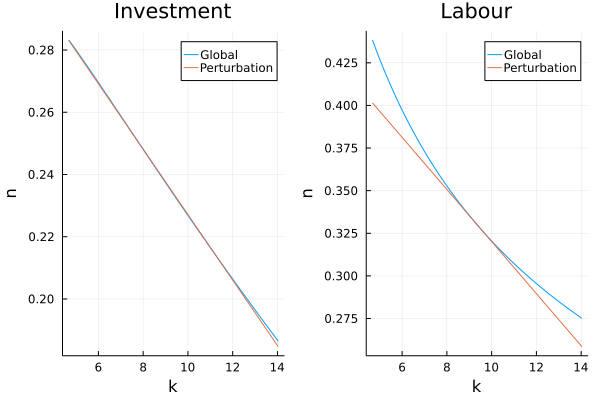

In [121]:
using Plots

p1 = plot(tab_global[V=:k],tab_global[V=:i],label = "Global", title = "Investment", xlabel = "k", ylabel = "n")
plot!(p1,tab_pert[V=:k],tab_pert[V=:i],label = "Perturbation")

p2 = plot(tab_global[V=:k],tab_global[V=:n],label = "Global", title = "Labour", xlabel = "k", ylabel = "n")
plot!(p2,tab_pert[V=:k],tab_pert[V=:n],label = "Perturbation")

plot(p1,p2,layout = (1,2))


It would seem, according to this, that second order perturbation does very well for the RBC model. We will revisit this issue more rigorously when we explore the deviations from the model's arbitrage section equations.
Let us repeat the calculation of investment decisions for various values of the depreciation rate, $\delta$. Note that this is a comparative statics exercise, even though the models compared are dynamic.

In [125]:
original_delta = model.calibration.flat[:delta] 

drs = []
delta_values = LinRange(0.01, 0.04,5)
for val in delta_values
    set_calibration!(model,:delta,val)
    push!(drs,perturb(model))
end
println("drs=")

for i,dr in enumerate(drs)
    sim = tabulate(model, dr,:k)
    plot(sim[:k],sim[:i], label='$\delta={}$'.format(delta_values[i]),ylabel="i", title = "Investment")
end

#set_calibration!(model,:delta,original_delta)

[0.000256]
[0.000256]


ErrorException: syntax: invalid iteration specification